In [14]:
import pandas as pd
import numpy as np
file_path ='StudentsPerformance.csv'
df = pd.read_csv(file_path)

In [11]:
df.isnull().any()

gender                         False
race/ethnicity                 False
parental level of education    False
lunch                          False
test preparation course        False
math score                     False
reading score                  False
writing score                  False
dtype: bool

In [16]:
df.loc[:9, 'math score'] = np.nan

In [18]:
df.head(12)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,NaN,72,74
1,female,group C,some college,standard,completed,NaN,90,88
2,female,group B,master's degree,standard,none,NaN,95,93
3,male,group A,associate's degree,free/reduced,none,NaN,57,44
4,male,group C,some college,standard,none,NaN,78,75
5,female,group B,associate's degree,standard,none,NaN,83,78
6,female,group B,some college,standard,completed,NaN,95,92
7,male,group B,some college,free/reduced,none,NaN,43,39
8,male,group D,high school,free/reduced,completed,NaN,64,67
9,female,group B,high school,free/reduced,none,NaN,60,50


In [19]:
df.isnull().any()

gender                         False
race/ethnicity                 False
parental level of education    False
lunch                          False
test preparation course        False
math score                      True
reading score                  False
writing score                  False
dtype: bool

In [50]:
df['math_score'].fillna(df['math_score'].mean(),inplace=True)

/tmp/ipykernel_6493/1133810298.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['math_score'].fillna(df['math_score'].mean(),inplace=True)


In [22]:
# Removing outliers using Interquartile range
def remove_outlier(column):
    Q1=column.quantile(0.25)
    Q3=column.quantile(0.75)
    IQR=Q3-Q1
    lower=Q1-1.5*IQR
    upper=Q3+1.5*IQR

    return column.clip(lower,upper)

In [33]:
# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Remove outliers
df['math_score'] = remove_outlier(df['math_score'])

In [34]:
df.describe()

,math_score,reading_score,writing_score
count,990.000000,1000.000000,1000.000000
mean,66.171717,69.169000,68.054000
std,14.894262,14.600192,15.195657
min,27.000000,17.000000,10.000000
25%,57.000000,59.000000,57.750000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


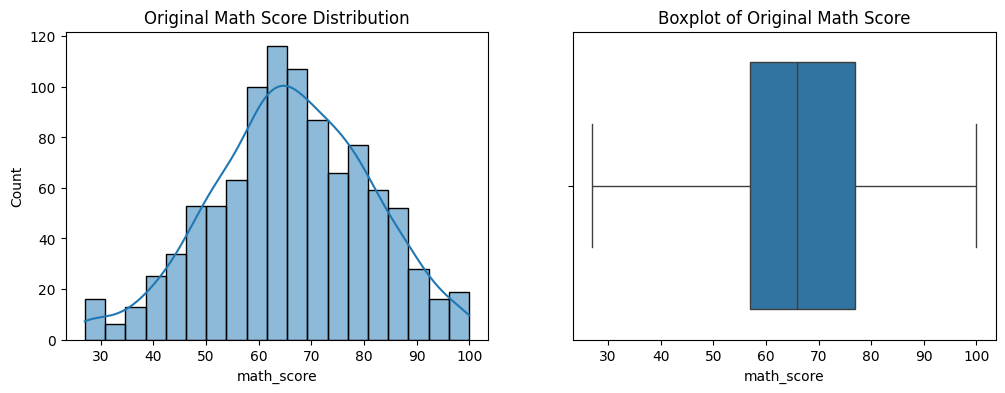

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.histplot(df['math_score'], kde=True)
plt.title("Original Math Score Distribution")

plt.subplot(1,2,2)
sns.boxplot(x=df['math_score'])
plt.title("Boxplot of Original Math Score")

plt.show()


In [37]:
import numpy as np

df['log_math_score'] = np.log(df['math_score'] + 1)


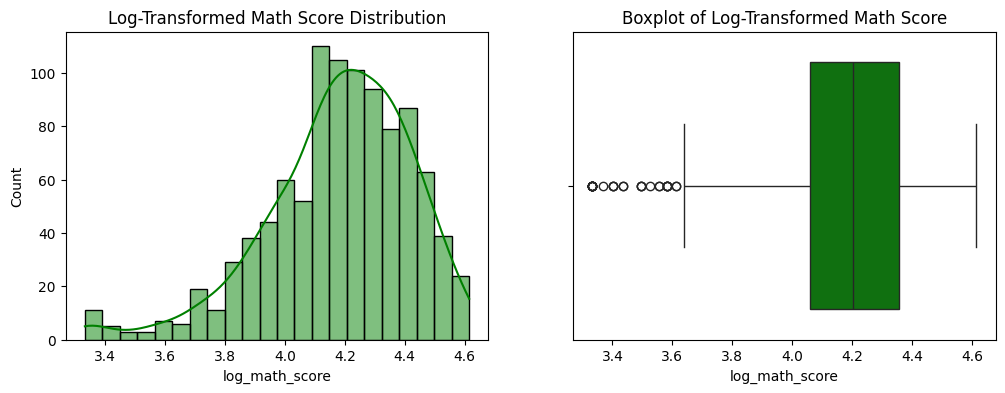

In [38]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.histplot(df['log_math_score'], kde=True, color='green')
plt.title("Log-Transformed Math Score Distribution")

plt.subplot(1,2,2)
sns.boxplot(x=df['log_math_score'], color='green')
plt.title("Boxplot of Log-Transformed Math Score")

plt.show()


In [42]:
plt.figure(figsize=(6,4))

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

In [43]:
sns.scatterplot(x=df['study_hours'], y=df['math_score'])

KeyError: 'study_hours'

In [45]:
df['test_preparation_course'].value_counts()

test_preparation_course
none         642
completed    358
Name: count, dtype: int64

In [46]:
df['test_prep_encoded']=df['test_preparation_course'].map({'none':0,'completed':1})

In [51]:
df

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,log_math_score,test_prep_encoded
0,female,group B,bachelor's degree,standard,none,66.171717,72,74,NaN,0
1,female,group C,some college,standard,completed,66.171717,90,88,NaN,1
2,female,group B,master's degree,standard,none,66.171717,95,93,NaN,0
3,male,group A,associate's degree,free/reduced,none,66.171717,57,44,NaN,0
4,male,group C,some college,standard,none,66.171717,78,75,NaN,0
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88.000000,99,95,4.488636,1
996,male,group C,high school,free/reduced,none,62.000000,55,55,4.143135,0
997,female,group C,high school,free/reduced,completed,59.000000,71,65,4.094345,1
998,female,group D,some college,standard,completed,68.000000,78,77,4.234107,1


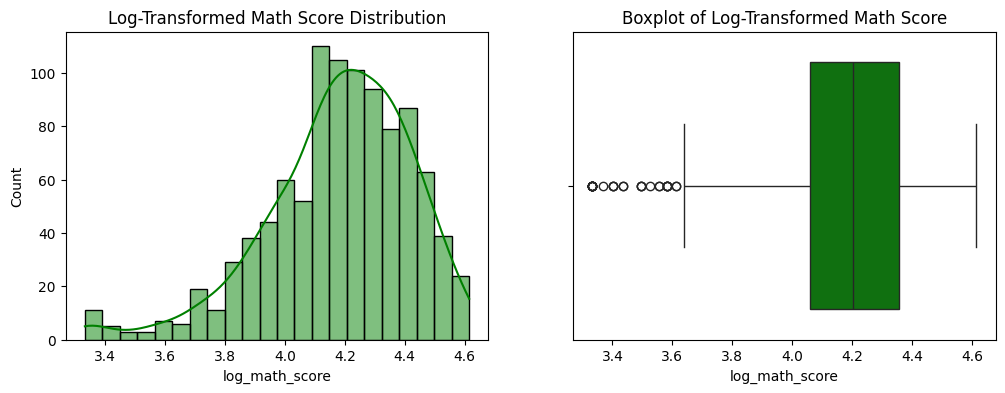

In [52]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.histplot(df['log_math_score'], kde=True, color='green')
plt.title("Log-Transformed Math Score Distribution")

plt.subplot(1,2,2)
sns.boxplot(x=df['log_math_score'], color='green')
plt.title("Boxplot of Log-Transformed Math Score")

plt.show()


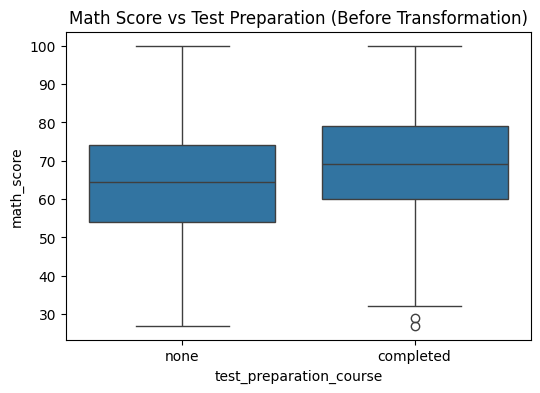

In [53]:
plt.figure(figsize=(6,4))
sns.boxplot(x='test_preparation_course', y='math_score', data=df)
plt.title("Math Score vs Test Preparation (Before Transformation)")
plt.show()


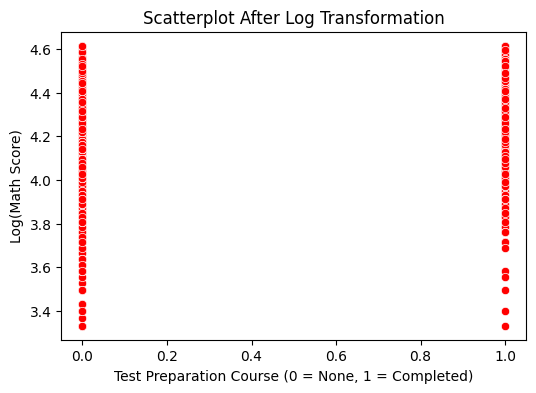

In [54]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    x='test_prep_encoded',
    y='log_math_score',
    data=df,
    color='red'
)
plt.xlabel("Test Preparation Course (0 = None, 1 = Completed)")
plt.ylabel("Log(Math Score)")
plt.title("Scatterplot After Log Transformation")
plt.show()


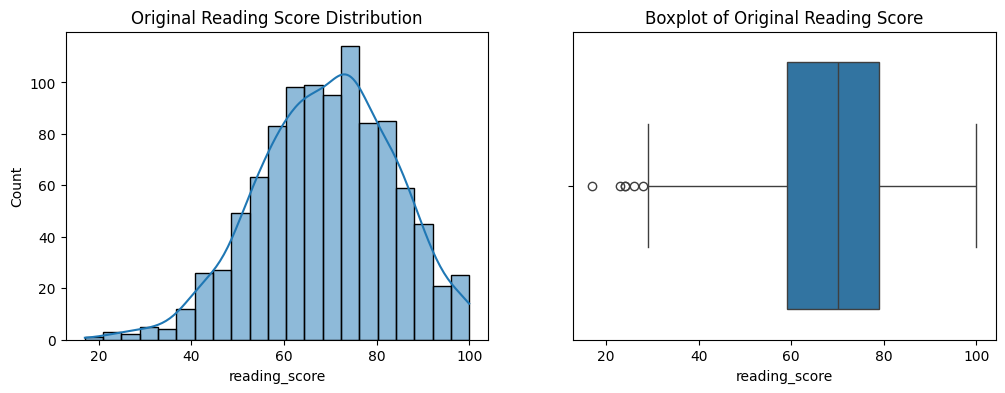

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.histplot(df['reading_score'], kde=True)
plt.title("Original Reading Score Distribution")

plt.subplot(1,2,2)
sns.boxplot(x=df['reading_score'])
plt.title("Boxplot of Original Reading Score")

plt.show()

KeyError: 'log_reading_score'

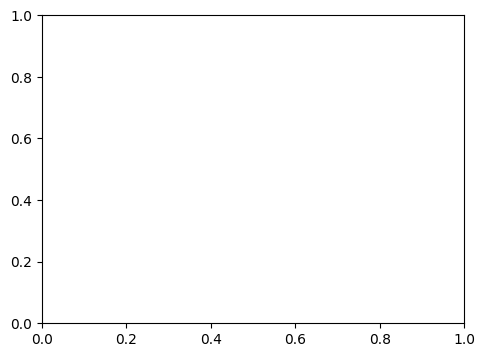

In [56]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.histplot(df['log_reading_score'], kde=True, color='green')
plt.title("Log-Transformed Reading Score Distribution")

plt.subplot(1,2,2)
sns.boxplot(x=df['log_reading_score'], color='green')
plt.title("Boxplot of Log-Transformed Reading Score")

plt.show()

In [60]:
# Ensure math_score has only positive values
df['math_score_bc'] = df['math_score'] + 1


In [61]:
from scipy.stats import boxcox

df['boxcox_math_score'], lambda_value = boxcox(df['math_score_bc'])

print("Lambda value:", lambda_value)


Lambda value: 1.191508357679712


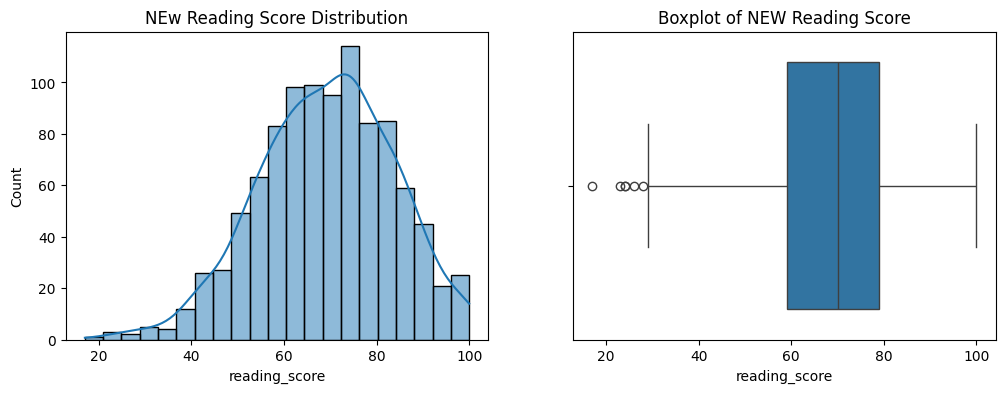

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.histplot(df['reading_score'], kde=True)
plt.title("NEw Reading Score Distribution")

plt.subplot(1,2,2)
sns.boxplot(x=df['reading_score'])
plt.title("Boxplot of NEW Reading Score")

plt.show()

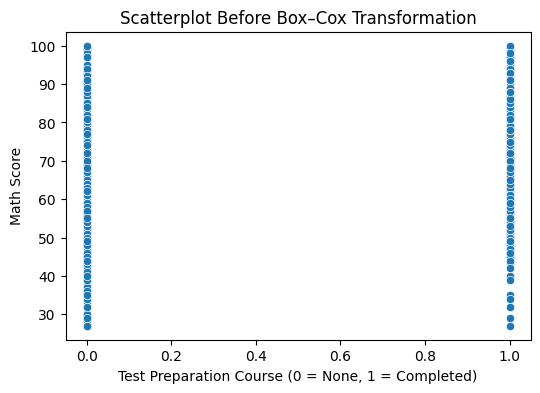

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.scatterplot(
    x='test_prep_encoded',
    y='math_score',
    data=df
)
plt.xlabel("Test Preparation Course (0 = None, 1 = Completed)")
plt.ylabel("Math Score")
plt.title("Scatterplot Before Box–Cox Transformation")
plt.show()


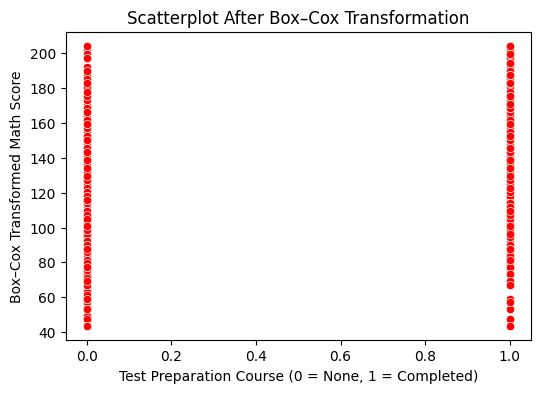

In [64]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    x='test_prep_encoded',
    y='boxcox_math_score',
    data=df,
    color='red'
)
plt.xlabel("Test Preparation Course (0 = None, 1 = Completed)")
plt.ylabel("Box–Cox Transformed Math Score")
plt.title("Scatterplot After Box–Cox Transformation")
plt.show()
